In [1]:
import torchvision

In [2]:
model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /home/ppeczek/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


In [3]:
model.eval()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [12]:
!wget https://github.com/PawelPeczek/ModelAsAService/blob/master/data/people_detection/5.jpg?raw=true

--2021-03-06 11:59:13--  https://github.com/PawelPeczek/ModelAsAService/blob/master/data/people_detection/5.jpg?raw=true
Translacja github.com (github.com)... 140.82.121.3
Łączenie się z github.com (github.com)|140.82.121.3|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 302 Found
Lokalizacja: https://github.com/PawelPeczek/ModelAsAService/raw/master/data/people_detection/5.jpg [podążanie]
--2021-03-06 11:59:14--  https://github.com/PawelPeczek/ModelAsAService/raw/master/data/people_detection/5.jpg
Ponowne użycie połączenia do github.com:443.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 302 Found
Lokalizacja: https://raw.githubusercontent.com/PawelPeczek/ModelAsAService/master/data/people_detection/5.jpg [podążanie]
--2021-03-06 11:59:14--  https://raw.githubusercontent.com/PawelPeczek/ModelAsAService/master/data/people_detection/5.jpg
Translacja raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Łąc

In [20]:
import cv2 as cv
import matplotlib.pyplot as plt

In [17]:
image = cv.imread("5.jpg?raw=true")

In [25]:
print(image[:, :, ::-1].shape)
print(image[:, :, ::-1].transpose(2, 0, 1).shape)

(902, 1280, 3)
(3, 902, 1280)


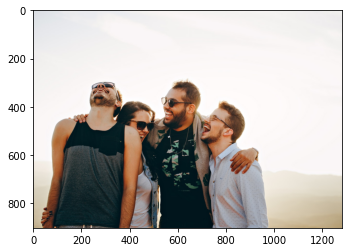

In [26]:
plt.imshow(image[:, :, ::-1])

In [36]:
import torch

x = [torch.Tensor(image.transpose(2, 0, 1).copy() / 255.0)]

In [37]:
predictions = model(x)

In [39]:
prediction = predictions[0]

In [46]:
boxes = prediction["boxes"].detach().numpy()

In [49]:
prediction["labels"]

tensor([ 1,  1,  1,  1,  1,  1, 27, 62, 27, 27,  1, 31, 31, 27, 63, 15, 39,  9,
        65, 19, 31, 27, 33, 31,  1,  1, 63, 37, 27,  1, 31, 62,  3,  9, 31, 42,
        15, 38, 77, 32, 42, 28, 31, 27, 28, 38, 33, 31, 62, 43, 32, 36, 18])

In [50]:
boxes

array([[690.3273  , 372.43515 , 973.3716  , 896.18384 ],
       [ 52.201694, 297.17377 , 522.6515  , 902.00006 ],
       [457.60742 , 287.74896 , 728.57245 , 897.2727  ],
       [534.86206 , 303.61713 , 910.2508  , 896.6366  ],
       [335.91766 , 396.9723  , 513.0429  , 891.0714  ],
       [210.21544 , 303.7401  , 846.0322  , 900.2104  ],
       [ 72.95742 , 316.27338 , 525.58887 , 894.0458  ],
       [ 65.49781 , 329.234   , 528.19183 , 887.7848  ],
       [335.91766 , 396.9723  , 513.0429  , 891.0714  ],
       [194.23015 , 464.4081  , 502.20682 , 874.8109  ],
       [372.05505 , 390.8591  , 653.5804  , 886.43115 ],
       [335.91766 , 396.9723  , 513.0429  , 891.0714  ],
       [ 47.788853, 300.0812  , 526.91785 , 894.72644 ],
       [453.44785 , 344.99713 , 731.2594  , 864.4563  ],
       [ 60.63835 , 515.3648  , 775.84436 , 897.2094  ],
       [160.46606 , 370.7324  , 860.43463 , 888.18115 ],
       [484.51886 , 686.4484  , 524.61444 , 893.8129  ],
       [ 26.38935 , 478.22073 ,

In [79]:
from typing import Tuple, List
from dataclasses import dataclass

@dataclass
class BoundingBox:
    left_top: Tuple[int, int]
5
    for inference_result in inference_results:
    right_bottom: Tuple[int, int]

@dataclass
class InferenceResult:
    bbox: BoundingBox
    confidence: float
    label: int

In [86]:
from torchvision.models.detection.retinanet import RetinaNet
import numpy as np


InferenceResults = List[InferenceResult]

CONFIDENCE_THRESHOLD = 0.4

def infer_from_image(
    image: np.ndarray, 
    model: RetinaNet
) -> InferenceResults:
    image = image[:, :, ::-1].transpose(2, 0, 1).copy() / 255.0
    prediction = model(torch.Tensor([image]))[0]
    return _post_process_inference(p
5
    for inference_result in inference_results:rediction=prediction)
    
def _post_process_inference(prediction: dict) -> InferenceResults:
    boxes, scores, labels = \
        prediction["boxes"].detach().numpy(), \
        prediction["scores"].detach().numpy(), \
        prediction["labels"].detach().numpy()
    inference_results = []
    for bbox, score, label in zip(boxes, scores, labels):
        if score < CONFIDENCE_THRESHOLD:
            continue
        bbox = BoundingBox(
            left_top=(int(round(bbox[0])), int(round(bbox[1]))),
            right_bottom=(int(round(bbox[2])), int(round(bbox[3])))
        )
        inference_result = InferenceResult(
            bbox=bbox,
            confidence=score,
            label=label
        )
        inference_results.append(inference_result)
    return inference_results

In [87]:
results = infer_from_image(image, model)

In [88]:
results

[InferenceResult(bbox=BoundingBox(left_top=(686, 370), right_bottom=(974, 895)), confidence=0.9365322, label=1),
 InferenceResult(bbox=BoundingBox(left_top=(63, 292), right_bottom=(493, 895)), confidence=0.927143, label=1),
 InferenceResult(bbox=BoundingBox(left_top=(452, 283), right_bottom=(737, 898)), confidence=0.8462995, label=1),
 InferenceResult(bbox=BoundingBox(left_top=(342, 385), right_bottom=(518, 875)), confidence=0.4074388, label=1)]

In [89]:
def visualise_inference_results(input_image: np.ndarray,
                                inference_results: InferenceResults
                                ) -> np.ndarray:
    input_image = input_image.copy()
    for inference_result in inference_results:
        input_image = _draw_bbox(
            input_image=input_image,
            inference_result=inference_result
        )
    return input_image
    
    
def _draw_bbox(input_image: np.ndarray,
               inference_result: InferenceResult
               ) -> np.ndarray:
    color = (255, 0, 0)
    cv.rectangle(
        img=input_image,
        pt1=inference_result.bbox.left_top,
        pt2=inference_result.bbox.right_bottom,
        color=color,
        thickness=5
    )
    return input_image

In [90]:
result = visualise_inference_results(image, results)

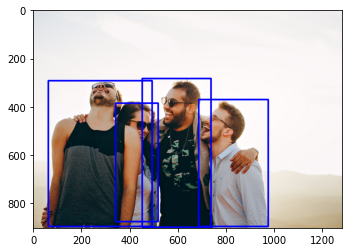

In [91]:
plt.imshow(result[:, :, ::-1])

In [92]:
CLASS_NAMES = {
    0: '__background__',
     1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 12: 'stop sign',
 13: 'parking meter',
 14: 'bench',
 15: 'bird',
 16: 'cat',
 17: 'dog',
 18: 'horse',
 19: 'sheep',
 20: 'cow',
 21: 'elephant',
 22: 'bear',
 23: 'zebra',
 24: 'giraffe',
 25: 'backpack',
 26: 'umbrella',
 27: 'handbag',
 28: 'tie',
 29: 'suitcase',
 30: 'frisbee',
 31: 'skis',
 32: 'snowboard',
 33: 'sports ball',
 34: 'kite',
 35: 'baseball bat',
 36: 'baseball glove',
 37: 'skateboard',
 38: 'surfboard',
 39: 'tennis racket',
 40: 'bottle',
 41: 'wine glass',
 42: 'cup',
 43: 'fork',
 44: 'knife',
 45: 'spoon',
 46: 'bowl',
 47: 'banana',
 48: 'apple',
 49: 'sandwich',
 50: 'orange',
 51: 'broccoli',
 52: 'carrot',
 53: 'hot dog',
 54: 'pizza',
 55: 'donut',
 56: 'cake',
 57: 'chair',
 58: 'couch',
 59: 'potted plant',
 60: 'bed',
 61: 'dining table',
 62: 'toilet',
 63: 'tv',
 64: 'laptop',
 65: 'mouse',
 66: 'remote',
 67: 'keyboard',
 68: 'cell phone',
 69: 'microwave',
 70: 'oven',
 71: 'toaster',
 72: 'sink',
 73: 'refrigerator',
 74: 'book',
 75: 'clock',
 76: 'vase',
 77: 'scissors',
 78: 'teddy bear',
 79: 'hair drier',
 80: 'toothbrush'
              }

In [93]:
CLASS_NAMES

{0: '__background__',
 1: 'person',
 2: 'bicycle',
 3: 'car',
 4: 'motorcycle',
 5: 'airplane',
 6: 'bus',
 7: 'train',
 8: 'truck',
 9: 'boat',
 10: 'traffic light',
 11: 'fire hydrant',
 12: 'stop sign',
 13: 'parking meter',
 14: 'bench',
 15: 'bird',
 16: 'cat',
 17: 'dog',
 18: 'horse',
 19: 'sheep',
 20: 'cow',
 21: 'elephant',
 22: 'bear',
 23: 'zebra',
 24: 'giraffe',
 25: 'backpack',
 26: 'umbrella',
 27: 'handbag',
 28: 'tie',
 29: 'suitcase',
 30: 'frisbee',
 31: 'skis',
 32: 'snowboard',
 33: 'sports ball',
 34: 'kite',
 35: 'baseball bat',
 36: 'baseball glove',
 37: 'skateboard',
 38: 'surfboard',
 39: 'tennis racket',
 40: 'bottle',
 41: 'wine glass',
 42: 'cup',
 43: 'fork',
 44: 'knife',
 45: 'spoon',
 46: 'bowl',
 47: 'banana',
 48: 'apple',
 49: 'sandwich',
 50: 'orange',
 51: 'broccoli',
 52: 'carrot',
 53: 'hot dog',
 54: 'pizza',
 55: 'donut',
 56: 'cake',
 57: 'chair',
 58: 'couch',
 59: 'potted plant',
 60: 'bed',
 61: 'dining table',
 62: 'toilet',
 63: 'tv',
 

In [94]:
torch.__version__

'1.8.0'

In [95]:
torchvision.__version__

'0.9.0'